In [4]:
# !pip install requests
import os
import requests
import pandas as pd 
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import zipfile
import json

In [5]:
## Part 1 - MN Geocommons

# Get the Minneapolis Bike Trails meta data from MN Geo Commons
mngeocom_biketrails_package = requests.get("https://gisdata.mn.gov/api/3/action/package_show?id=bb164aee-f885-4cbf-bbb3-4dcd8baa8547")

# Make JSON
biketrail_json = mngeocom_biketrails_package.json()

# Get URL from JSON
biketrail_url = biketrail_json['result']['resources'][0]['url']

print(biketrail_url)

https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_metrogis/trans_metro_colabtiv_trails_bike/gpkg_trans_metro_colabtiv_trails_bike.zip


In [6]:
# Download the actual bike trail data from the URL
biketrail_data_download = requests.get(biketrail_url)

# Check if the request was successful
if biketrail_data_download.status_code == 200:
    mn_biketrail_data = "biketrail_data.zip"  
    with open(mn_biketrail_data, 'wb') as file:
        file.write(biketrail_data_download.content)
    print(f"Downloaded '{mn_biketrail_data}' successfully.")
    
    # Step 3: Unzip the file if it is a ZIP file
    if mn_biketrail_data.endswith('.zip'):
        with zipfile.ZipFile(mn_biketrail_data, 'r') as zip_ref:
            zip_ref.extractall("unzipped_content")
        print("Unzipped the file successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


Downloaded 'biketrail_data.zip' successfully.
Unzipped the file successfully.


In [7]:
# Read the CSV file
biketrail_df = gpd.read_file("./unzipped_content/trans_metro_colabtiv_trails_bike.gpkg")
print(biketrail_df)

/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Non-conformant content for record 1 in column EDITED_DT, 2020-02-05T22:05:39.0Z, successfully parsed
  return ogr_read(


                                  UNIQUE_ID  \
0      CF378743-11BF-4954-8632-C50D8CB6E80B   
1      8AFE349A-1E2F-4E43-BE88-0B8769DD34A7   
2      F0FF0B96-4ECF-4703-86CC-C2C5FEBFFA90   
3      CA87AD16-EE5F-4DAB-B5F9-2A399526B29D   
4      EB23357A-CA12-441A-87F5-FDA9693C370D   
...                                     ...   
43144  B7AB8DFD-1CF0-4340-85F6-DA76A524036B   
43145  302CE6BF-47CA-44FC-83BC-A91BDD1C69E0   
43146  5F0F4356-7D7C-4263-A22A-C1FA6BE444DF   
43147  5F0F4356-7D7C-4263-A22A-C1FA6BE444DF   
43148  5F0F4356-7D7C-4263-A22A-C1FA6BE444DF   

                                          TRAILNAME TRLSYSNAME SHAREDNAME  \
0             Rum River Central Regional Park Trail       None       None   
1      Martin-Island-Linwood Lakes Reg. Park Trail        None       None   
2                                Kordiak Park Trail       None       None   
3                  East Anoka County Regional Trail       None       None   
4          RCCOL Trail (Natural Surface Park Trail

In [8]:
## Part 2 - NDAWN 

# URL for NDAWN weekly average data for the week beginning September 23, 2024 for Ada, MN 1n (2007-)
NDAWN_url = 'https://ndawn.ndsu.nodak.edu/table.csv?station=78&variable=wdmxt&ttype=weekly&quick_pick=&begin_date=2024-09-23&count=1'

# API Request with Pandas
NDAWN_pd = pd.read_csv(NDAWN_url, skiprows=[0, 1, 2, 4])

print(NDAWN_pd)

  Station Name  Latitude  Longitude  Elevation  Year  Month  Day  \
0          Ada  47.32119  -96.51406        910  2024      9   23   

   Avg Max Temp  Number Missing  Number Estimated  
0        80.294               0                 0  


In [9]:
## OR

## Part 2 - NDAWN

# URL for NDAWN weekly average data for the week beginning September 23, 2024 for Ada, MN 1n (2007-)
NDAWN_url = 'https://ndawn.ndsu.nodak.edu/table.csv?station=78&variable=wdmxt&ttype=weekly&quick_pick=&begin_date=2024-09-23&count=1'

# Send a GET request to the URL
NDAWN_request = requests.get(NDAWN_url)

# Check if the request was successful
if NDAWN_request.status_code == 200:
    with open('weather_data.csv', 'wb') as f:
        f.write(NDAWN_request.content)
    print("CSV file downloaded successfully")
else:
    print(f"Failed to download CSV file. Status code: {NDAWN_request.status_code}")

CSV file downloaded successfully


In [10]:
## Part 3 - ArcGIS Rest API

# URL for Parks in Hennepin County
Hennepin_Parks_URL = 'https://gis.hennepin.us/arcgis/rest/services/HennepinData/PLACES/MapServer/3/query?where=1%3D1&text=&objectIds=&time=&timeRelation=esriTimeRelationOverlaps&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=*&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&sqlFormat=none&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson'

# Send a GET request to the URL
parks_request = requests.get(Hennepin_Parks_URL)

# Check if the request was successful
if parks_request.status_code == 200:
    with open('parks_data.geojson', 'wb') as f:
        f.write(parks_request.content)
    print("GeoJSON file downloaded successfully")
else:
    print(f"Failed to download GeoJSON file. Status code: {parks_request.status_code}")

GeoJSON file downloaded successfully


Data retrieved successfully!


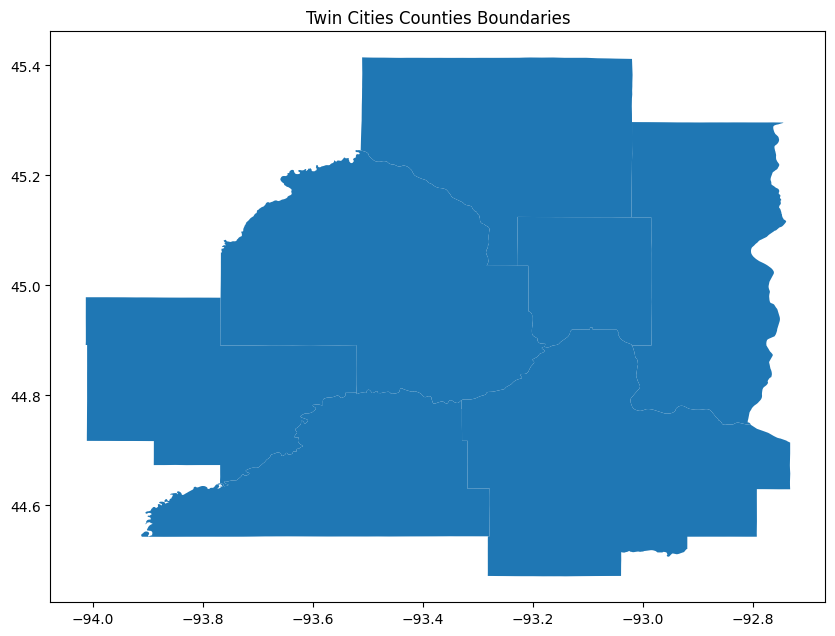

In [11]:
# Bonus - get Twin Cities metro area counties boundaries shapefile to beable to plot bike trails and parks within this boundary
twincities_counties_url = "https://arcgis.metc.state.mn.us/server/rest/services/GISLibrary/Counties/FeatureServer/0/query"
params = {
    'where': '1=1',
    'outFields': '*',
    'f': 'geojson'
}

response = requests.get(twincities_counties_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    print("Data retrieved successfully!")
    
    # Load the GeoJSON data into a GeoDataFrame
    twincities_counties_data = response.json()  
    twincities_counties_gdf = gpd.GeoDataFrame.from_features(twincities_counties_data['features'])  
    
    # Plot the GeoDataFrame
    twincities_counties_gdf.plot(figsize=(10, 10))
    plt.title("Twin Cities Counties Boundaries")
    plt.show()
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

In [12]:
## Part 4 - Spatially join the MN Geospatial Commons Geopackage and ArcGIS Rest API GeoJSON

import fiona

gpkg_layers = fiona.listlayers("./unzipped_content/trans_metro_colabtiv_trails_bike.gpkg")
print(gpkg_layers)

['MetroCollaborativeTrailsBikeways']


In [13]:
# Load the bike trails GeoPackage using geopandas
biketrails_gdf1 = gpd.read_file("./unzipped_content/trans_metro_colabtiv_trails_bike.gpkg", layer="MetroCollaborativeTrailsBikeways")

# Load the Hennepin County parks GeoJSON file using geopandas
parks_gdf2 = gpd.read_file("parks_data.geojson")

/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Non-conformant content for record 1 in column EDITED_DT, 2020-02-05T22:05:39.0Z, successfully parsed
  return ogr_read(


In [16]:
# Check coordinate reference systems for all GeoDataFrames
print(biketrails_gdf1.crs)
print(parks_gdf2.crs)

twincities_counties_gdf = twincities_counties_gdf.set_crs(epsg=4326)
print(twincities_counties_gdf.crs)

EPSG:26915
EPSG:26915
EPSG:4326


In [17]:
# Reproject coordinate reference systems so they match
if biketrails_gdf1.crs != parks_gdf2.crs:
    parks_gdf2 = parks_gdf2.to_crs(biketrails_gdf1.crs)
if twincities_counties_gdf.crs != biketrails_gdf1.crs:
    twincities_counties_gdf = twincities_counties_gdf.to_crs(biketrails_gdf1.crs)

In [18]:
# Recheck coordinate reference systems for both GeoDataFrames to see if they now match
print(biketrails_gdf1.crs)
print(parks_gdf2.crs)
print(twincities_counties_gdf.crs)

EPSG:26915
EPSG:26915
EPSG:26915


<Axes: >

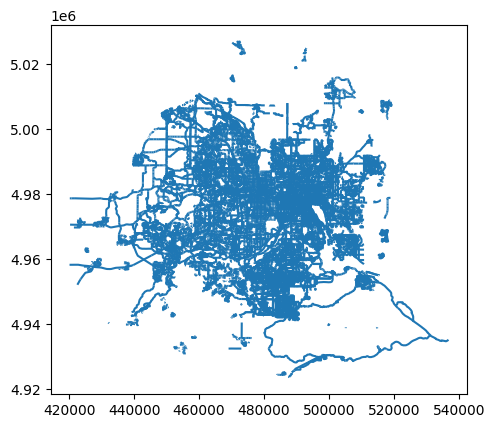

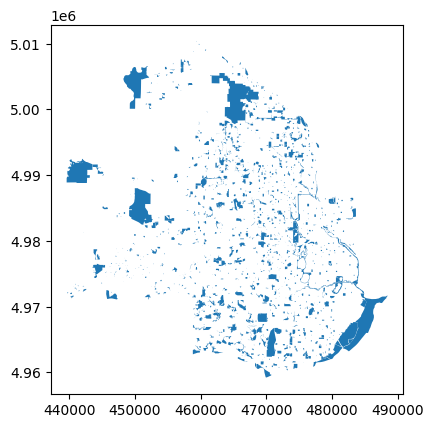

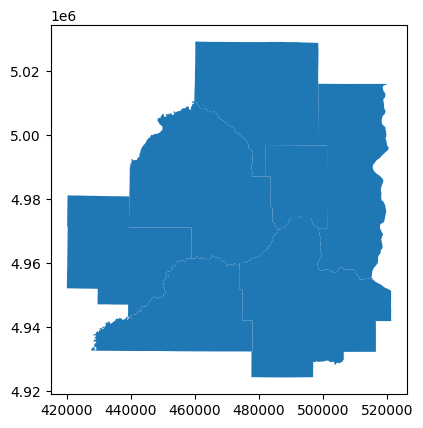

In [19]:
# Plot the geodataframes
biketrails_gdf1.plot()
parks_gdf2.plot()
twincities_counties_gdf.plot()

/var/folders/xk/wyb749tx4c3fk4rfqlw43hnc0000gn/T/ipykernel_1970/3608993867.py:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


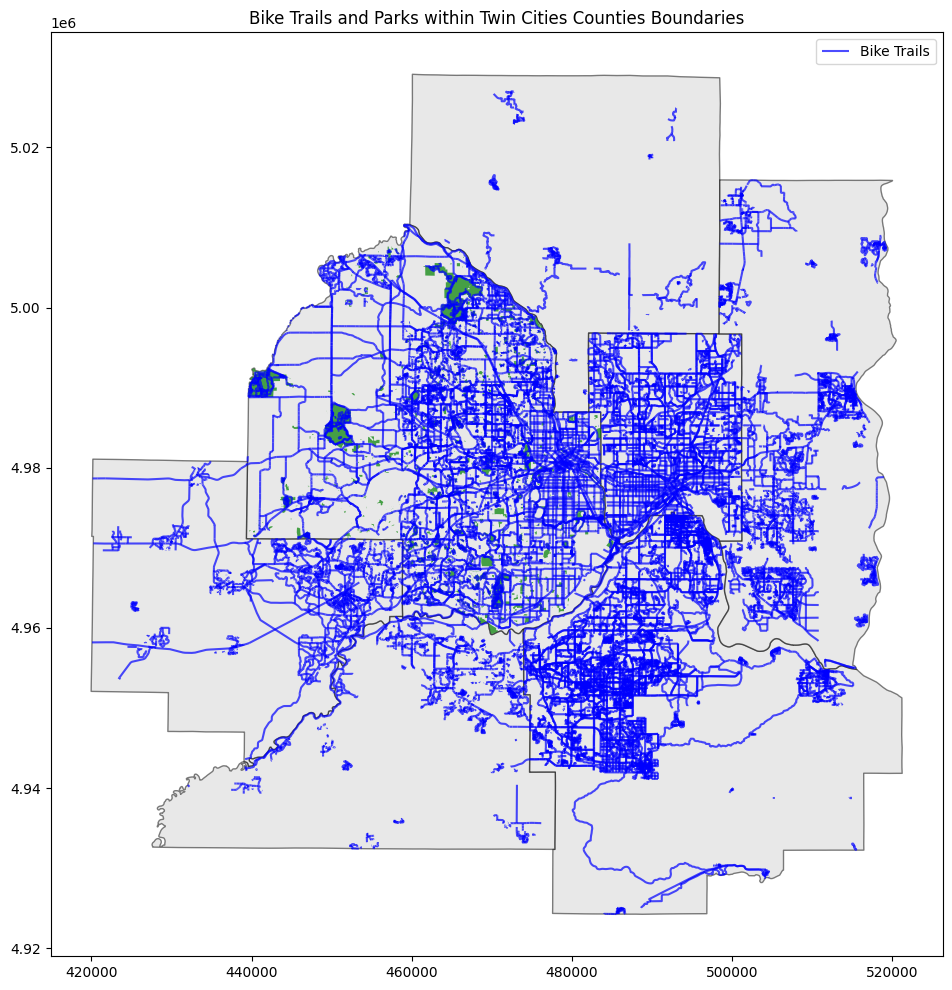

In [20]:
# Perform spatial join with Twin Cities Counties boundaries

# Spatial join to get bike trails within Twin Cities Counties boundaries
biketrails_within_boundary = gpd.sjoin(biketrails_gdf1, twincities_counties_gdf, how="inner", predicate="within")

# Spatial join to get parks within Twin Cities Counties boundaries
parks_within_boundary = gpd.sjoin(parks_gdf2, twincities_counties_gdf, how="inner", predicate="within")

# Plot the results
fig, ax = plt.subplots(figsize=(12, 12))
twincities_counties_gdf.plot(ax=ax, color='lightgray', label='Twin Cities Counties', edgecolor='black', alpha=0.5)
biketrails_within_boundary.plot(ax=ax, color='blue', label='Bike Trails', alpha=0.7)
parks_within_boundary.plot(ax=ax, color='green', label='Parks', alpha=0.7)

plt.title("Bike Trails and Parks within Twin Cities Counties Boundaries")
plt.legend()
plt.show()

/var/folders/xk/wyb749tx4c3fk4rfqlw43hnc0000gn/T/ipykernel_1970/2489462316.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([biketrails_gdf1, parks_gdf2, twincities_counties_gdf]).plot()


<Axes: >

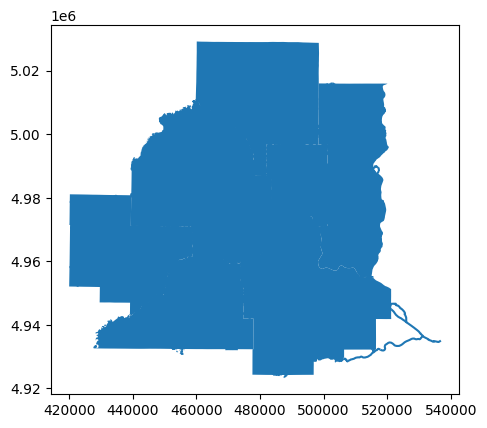

In [21]:
# Or

# Concatenate
pd.concat([biketrails_gdf1, parks_gdf2, twincities_counties_gdf]).plot()

In [22]:
# Print the heads of the merged GeoDataFrames

print(biketrails_within_boundary.head())
print(parks_within_boundary.head())

                              UNIQUE_ID  \
0  CF378743-11BF-4954-8632-C50D8CB6E80B   
1  8AFE349A-1E2F-4E43-BE88-0B8769DD34A7   
2  F0FF0B96-4ECF-4703-86CC-C2C5FEBFFA90   
3  CA87AD16-EE5F-4DAB-B5F9-2A399526B29D   
4  EB23357A-CA12-441A-87F5-FDA9693C370D   

                                      TRAILNAME TRLSYSNAME SHAREDNAME FED_SYS  \
0         Rum River Central Regional Park Trail       None       None      No   
1  Martin-Island-Linwood Lakes Reg. Park Trail        None       None      No   
2                            Kordiak Park Trail       None       None      No   
3              East Anoka County Regional Trail       None       None      No   
4      RCCOL Trail (Natural Surface Park Trail)       None       None      No   

  NTL_SYS STATE_SYS REG_SYS CTY_SYS LOC_SYS  ...  \
0      No        No      No     Yes      No  ...   
1      No        No      No     Yes      No  ...   
2      No        No      No     Yes      No  ...   
3      No        No     Yes     Yes      No  .

In [30]:
!pip install geopandas fiona

In [32]:
# Create a geodatabase

lab1_gpkg = 'lab1.gpkg'

# Save joined layers to the GeoPackage

biketrails_within_boundary.to_file(lab1_gpkg, layer='biketrails_within_boundary', driver='GPKG')
parks_within_boundary.to_file(lab1_gpkg, layer='parks_within_boundary', driver='GPKG')

print("Joined layers saved to GeoPackage.")

Joined layers saved to GeoPackage.
